## Generating pileups in python

The modules used here for generating pileups are pyBigWig ( https://github.com/deeptools/pyBigWig ) from deeptools and pysam ( http://pysam.readthedocs.io/en/latest/index.html ) made by Andreas Heger.

In [1]:
import pyBigWig
import pysam

import numpy as np
import matplotlib.pyplot as plt

Accessing pileup data from a bigWig is straight forward using pyBigWig. Create a bigWigFile object and use the .values('chromosome', start, end) method. Other information can also be displayed, including a dictionary holding chromosome lengths, using .chroms(), and the header, using .header(). The method .stats('chromosome', start, end, type='mean', nBins=1) can give the mean (set by default), max, min, coverage, std (standard deviation); the number of bins can also be set.

In [2]:
bigWigFile = pyBigWig.open("chrM.bw")

bigWigList = bigWigFile.values('chrM', 0, 16571)

bigWigFile.close()

The module pysam can also be used for accessing pileups from sam/bam files. Opening the file as a pysam.AlignmentFile makes the data contained in the object iterable, and the method .pileup('chromosome', start, end) can be used to select the read counts for a given region.  

In [8]:
bamFile = pysam.AlignmentFile("chrM.bam", "rb")

peakList = []

for read in bamFile.pileup('chrM'):
    peakList.append(read.n)

bamFile.close()

It is also possible to iterate through the reads of a given region using the method .fetch('chromosome', start, end) and manually generate the pileups as an array, using the loopVariable.reference_start and loopVariable.reference_end for the pileup positions.

In [11]:
bamFile = pysam.AlignmentFile("chrM.bam", "rb")

readCountArray = np.zeros(16571)

for read in bamFile.fetch('chrM'):
    readCountArray[read.reference_start:read.reference_end]+=1

bamFile.close()

Plots over similar regions of the chromosome (offset by 2bp to show the pattern).

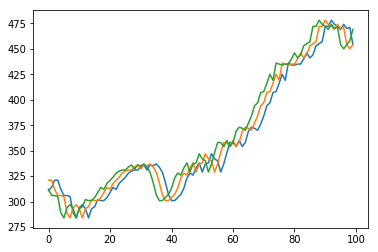

In [12]:
plt.plot(bigWigList[500:600])
plt.plot(peakList[502:602])
plt.plot(readCountArray[504:604])
plt.show()